# Thresholding

In [2]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/b7/8a/b2f7e1a434d56bf1d7570fc5941ace0847404e1032d7f1f0b8fed896568d/opencv_python-4.8.1.78-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 1.3 MB/s eta 0:00:00m eta 0:00:010:00:02m
Note: you may need to restart the kernel to use updated packages.


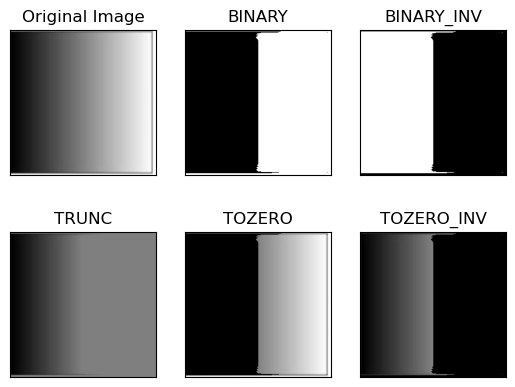

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/home/pratyush/Pictures/gradient.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

1. cv2.THRESH_BINARY :

In this method, pixels with intensity values greater than the threshold are set to the maximum value (255), and pixels with intensity values less than or equal to the threshold are set to 0.
Result (thresh1) will have binary values (0 or 255), creating a binary image.
cv2.

2. THRESH_BINARY_INV :

Similar to THRESH_BINARY, but the roles of 0 and 255 are inverted. Pixels with intensity values greater than the threshold are set to 0, and pixels with intensity values less than or equal to the threshold are set to the maximum value (255).
Result (thresh2) will have inverted binary values, creating the inverse of a binary image.
cv2.

3. THRESH_TRUNC :

This method truncates (limits) pixel values to the threshold. Pixels with intensity values greater than the threshold remain unchanged, while pixels with intensity values less than or equal to the threshold are set to the threshold value.
Result (thresh3) will have values up to the threshold, creating a flattened image.

4. cv2.THRESH_TOZERO :

Pixels with intensity values greater than the threshold remain unchanged, and pixels with intensity values less than or equal to the threshold are set to 0.
Result (thresh4) will have values greater than the threshold preserved and set others to 0.

5. cv2.THRESH_TOZERO_INV :

Similar to THRESH_TOZERO, but inverted. Pixels with intensity values greater than the threshold are set to 0, and pixels with intensity values less than or equal to the threshold remain unchanged.
Result (thresh5) will have values greater than the threshold set to 0 and others preserved.

## Adaptive thresholding

When the image is not in good illumination,the image is divided into different parts and threshold is calculated for different part

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('/home/pratyush/Downloads/2-Figure3-1.png', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian adaptive thresholding
adaptive_thresh_gaussian = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 4
)

# Apply Mean adaptive thresholding
adaptive_thresh_mean = cv2.adaptiveThreshold(
    image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 4
)

# Set a larger figure size
plt.figure(figsize=(12, 4))

# Plot the images using matplotlib
titles = ['Original Image', 'Adaptive Threshold (Gaussian)', 'Adaptive Threshold (Mean)']
images = [image, adaptive_thresh_gaussian, adaptive_thresh_mean]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], 'gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Adaptive Threshold Mean (cv2.ADAPTIVE_THRESH_MEAN_C):

In this method, the threshold value for each pixel is computed as the mean (average) of the pixel values in its neighborhood.
The neighborhood size is specified by the blockSize parameter in the cv2.adaptiveThreshold function.
If the pixel value is greater than the mean, it is set to the maximum value (commonly 255 for 8-bit images), otherwise, it is set to 0.
This method is suitable for images where the lighting conditions are relatively uniform.


Adaptive Threshold Gaussian (cv2.ADAPTIVE_THRESH_GAUSSIAN_C):

In this method, the threshold value for each pixel is computed using a weighted sum of the pixel values in its neighborhood. The weights are determined by a Gaussian window.
The neighborhood size (blockSize) and the standard deviation of the Gaussian window (C) are specified in the cv2.adaptiveThreshold function.
Pixels with values greater than the computed threshold are set to the maximum value, and pixels with values less than or equal to the threshold are set to 0.
This method is more robust to varying lighting conditions and is effective in handling images with uneven illumination.

## Global thresholding

OTSU's Thresholding

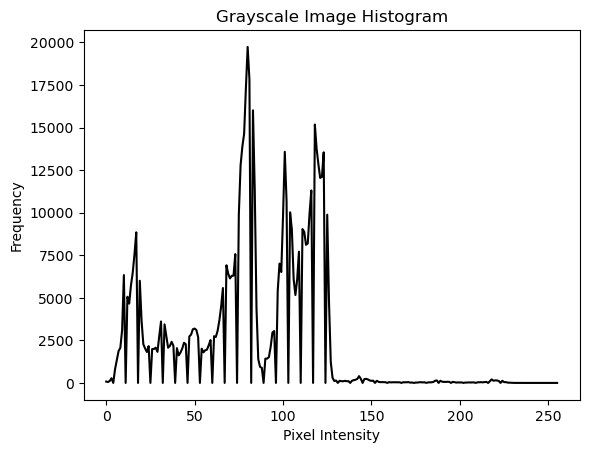

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image in grayscale
image = cv2.imread('/home/pratyush/Downloads/otsu.webp', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram, color='black')
plt.title('Grayscale Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


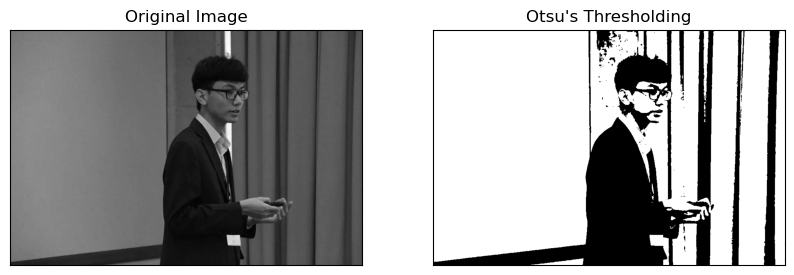

In [9]:
# Display the original image and Otsu's thresholded image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, 'gray')
plt.title('Original Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(otsu_threshold, 'gray')
plt.title("Otsu's Thresholding")
plt.xticks([]), plt.yticks([])

plt.show()

Otsu's method, also known as Otsu's thresholding or Otsu's binarization, is an automatic thresholding technique used to separate an image into two classes: foreground and background. The goal of Otsu's method is to find an optimal threshold that maximizes the variance between these two classes.

Means we can use this method if we are having peaks in histogram

# Blurring

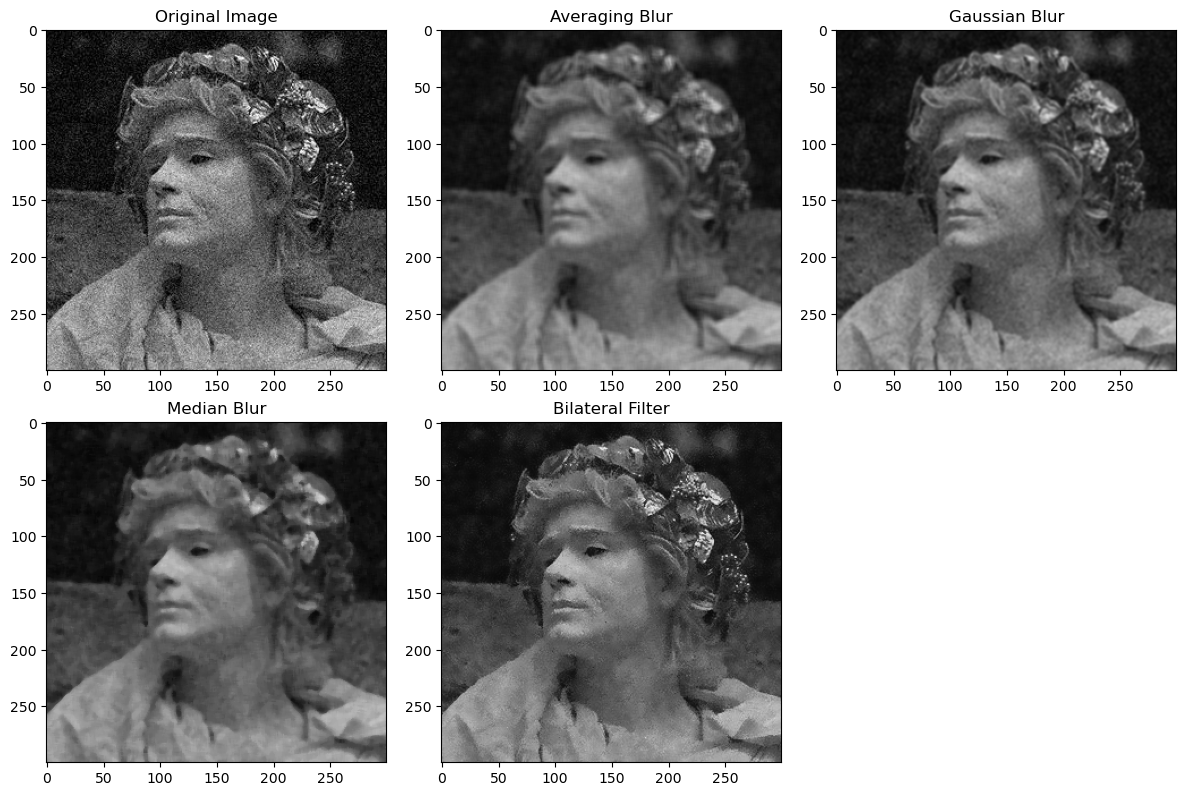

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/home/pratyush/Downloads/noisy.jpg')

# Convert image to RGB (for matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Averaging
blur_avg = cv2.blur(image, (5, 5))

# Gaussian Blur
blur_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

# Median Blur
blur_median = cv2.medianBlur(image, 5)

# Bilateral Filter
blur_bilateral = cv2.bilateralFilter(image, 9, 75, 75)

# Display the results using Matplotlib
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

plt.subplot(2, 3, 2)
plt.imshow(blur_avg)
plt.title('Averaging Blur')

plt.subplot(2, 3, 3)
plt.imshow(blur_gaussian)
plt.title('Gaussian Blur')

plt.subplot(2, 3, 4)
plt.imshow(blur_median)
plt.title('Median Blur')

plt.subplot(2, 3, 5)
plt.imshow(blur_bilateral)
plt.title('Bilateral Filter')

plt.tight_layout()
plt.show()


Averaging Blur:

Description: Averaging blur, also known as box blur, calculates the new pixel value as the average of the pixel values in the specified neighborhood (kernel).
Use Case:
Smoothing out minor variations in intensity.
Reducing noise in the image.

Gaussian Blur:

Description: Gaussian blur calculates the new pixel value as a weighted sum of the pixel values in the neighborhood, with more weight given to the central pixels. The weights are determined by a Gaussian function.
Use Case:
Smoothing images while preserving edges and maintaining the contrast.
Reducing noise.

Median Blur:

Description: Median blur sets the new pixel value to the median value of the pixel values in the specified neighborhood. It is effective at reducing the impact of outliers or random noise.
Use Case:
Removing salt-and-pepper noise,Beautifying

Bilateral Filter:

Description: Bilateral filter calculates the new pixel value based on both the spatial and intensity differences between the pixel and its neighbors. It preserves edges by considering both spatial proximity and intensity similarity.
Use Case:
Smoothing images while preserving edges.

# Lab Colour Scheme

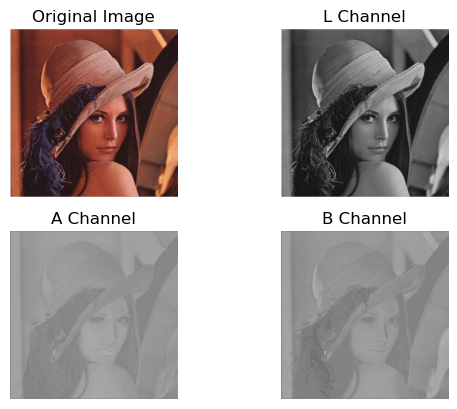

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('/home/pratyush/Downloads/TestImg.jpg')

# Convert BGR image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB image into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Display the original image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Display the LAB channels
plt.subplot(2, 2, 2)
plt.imshow(l_channel)
plt.title('L Channel')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(a_channel)
plt.title('A Channel')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(b_channel)
plt.title('B Channel')
plt.axis('off')

plt.show()


Applying colour corrections

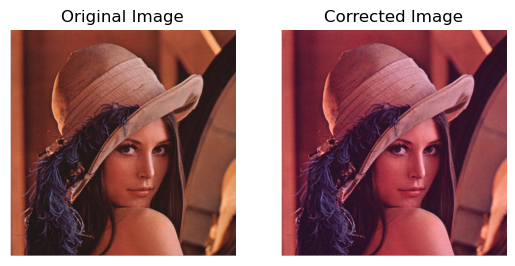

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('/home/pratyush/Downloads/TestImg.jpg')

# Convert BGR image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Increase or decrease the a* and b* channels
lab_image_corrected = lab_image.copy()
lab_image_corrected[:, :, 1] += 10  # Adjust a* channel
lab_image_corrected[:, :, 2] -= 10  # Adjust b* channel

# Convert LAB corrected image back to BGR
corrected_image = cv2.cvtColor(lab_image_corrected, cv2.COLOR_LAB2BGR)

# Display the original and corrected images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title('Corrected Image')
plt.axis('off')

plt.show()


Enhancing colour contrast

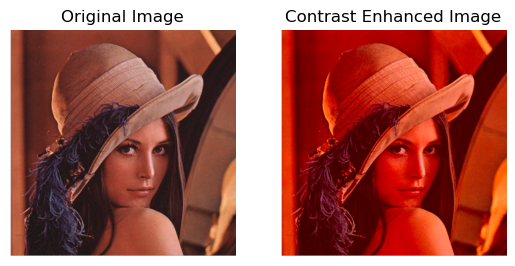

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('/home/pratyush/Downloads/TestImg.jpg')

# Convert BGR image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Increase contrast in the a* and b* channels
lab_image_contrast = lab_image.copy()
lab_image_contrast[:, :, 1] = cv2.addWeighted(lab_image_contrast[:, :, 1], 1.2, 0, 0, 0)
lab_image_contrast[:, :, 2] = cv2.addWeighted(lab_image_contrast[:, :, 2], 1.2, 0, 0, 0)

# Convert LAB contrasted image back to BGR
contrast_image = cv2.cvtColor(lab_image_contrast, cv2.COLOR_LAB2BGR)

# Display the original and contrasted images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(contrast_image, cv2.COLOR_BGR2RGB))
plt.title('Contrast Enhanced Image')
plt.axis('off')

plt.show()


Histogram transformation

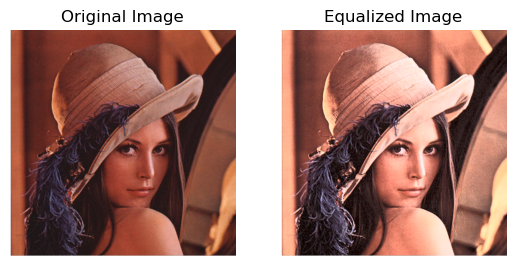

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('/home/pratyush/Downloads/TestImg.jpg')

# Convert BGR image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB image into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Perform histogram equalization on the L channel
l_channel_equalized = cv2.equalizeHist(l_channel)

# Merge the equalized L channel with the original A and B channels
lab_image_equalized = cv2.merge([l_channel_equalized, a_channel, b_channel])

# Convert LAB equalized image back to BGR
equalized_image = cv2.cvtColor(lab_image_equalized, cv2.COLOR_LAB2BGR)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(equalized_image, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.axis('off')

plt.show()


Histogram of the L Channel:
Compute the histogram of the L channel, which represents the distribution of pixel intensities in the image.

Cumulative Distribution Function (CDF):
Calculate the Cumulative Distribution Function (CDF) from the histogram. The CDF represents the cumulative sum of histogram values.

Histogram Equalization Transformation:
Map the original intensity values to new values using the CDF. This transformation aims to spread out the intensity values more evenly across the available range.

Apply Transformation to L Channel:
Apply the histogram equalization transformation to the L channel. This results in an equalized L channel with enhanced contrast.

Merge Equalized L Channel with A and B Channels:
Combine the equalized L channel with the original A and B channels to create the LAB image with enhanced contrast.

Convert Back to BGR:
Convert the LAB equalized image back to the BGR color space for display or further processing.

---------------------------------------------------------

Calculation of CDF

Compute the Histogram:
Given an image, compute the histogram, which is a representation of the distribution of pixel intensities.

Normalize the Histogram:
Normalize the histogram values by dividing each bin by the total number of pixels in the image. This step ensures that the histogram values are in the range [0, 1].

Compute the Cumulative Sum:
Calculate the cumulative sum of the normalized histogram values. Each element in the CDF represents the sum of all normalized histogram values up to that point.

Scale the CDF to the Intensity Range:
Scale the CDF to cover the entire intensity range (e.g., 0 to 255 for an 8-bit image). This step ensures that the mapping function will transform the original intensity values to the full range.

Create the Mapping Function:
The final step is to create the mapping function using the scaled CDF. The mapping function associates each original intensity value with its corresponding transformed value.

Image Segmentation

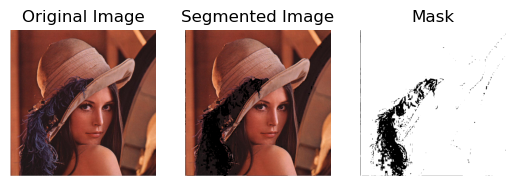

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Read the image
image = cv2.imread('/home/pratyush/Downloads/TestImg.jpg')

# Convert BGR image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB image into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Define a color range for segmentation in LAB space
lower_bound = np.array([0, 128, 128], dtype=np.uint8)
upper_bound = np.array([255, 255, 255], dtype=np.uint8)

# Create a mask based on the color range
mask = cv2.inRange(lab_image, lower_bound, upper_bound)

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Display the original, segmented, and mask images
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title('Segmented Image')
plt.axis('off')

plt.show()
